# Project Title - Analysis on Indian Premere League

Data Analytics is all about finding valuable insights that help businesses take right decisions. In this Project, I have done exploratory data analysis using python.Indian Premier League is a famous cricket league played in India every year during the period between March and May. It is played in a professional T20 format of the game. This league is played by 8 teams representing 8 different cities across India. This league started in 2008 and it has been a big hit and it is the most attended league in the World. Each team with their profit buys best players from across the World. It is also one of the big reason behind Indian team's success as the league brings out the best talent from a billion population in India.When it comes to Twenty20 cricket (T20), a more evolved and nuanced approach to analytics is the need of the hour — and the Indian Premier League (IPL) is a glaring example of this.Back in the day when Test matches were the be-all and end-all of cricket, data analysis simply meant keeping track of runs scored and wickets taken. Then came One-Day Internationals (ODIs), and the world woke up to strike rates, economy rates, chase precision, among others. Soon, we began to crunch video data to analyse player movements. Enter T20s, and we are now comparing ball-by-ball data streams with the existing legacy data to generate unprecedented real-time insights. In the end, T20 numbers need to be placed in more situational and contextual spaces — without compromising on the objectivity of analysis. For this, a whole new stats language is indispensable.The dataset that we have used for our analysis is the publicly available on kaggle which is a reservoir of datasets for all cricket matches of IPL. The analysis focusses on T20 matches in particular, and accordingly, we have analyze mathes, calculated and weighted the metrics for batsman and bowlers in context of the shorter version of the game.The data covers 10 seasons and includes ball-by-ball data. So for analysis I am going to use the Python packages are: numpy, pandas, matplotlib, and seaborn.I have learned all this tools and technique from the "Data Analysis with Python: Zero to Pandas" course in this course they taught each and every concept very well.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset



In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
project_name = "analysis-on-indian-premere-league"

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yaswanthbandi2003/analysis-on-indian-premere-league" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league


'https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league'

## Data Preparation and Cleaning

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

In [7]:
from urllib.request import urlretrieve

In [8]:
urlretrieve('https://github.com/ashutoshkrris/Data-Analysis-with-Python/raw/master/zerotopandas-course-project-starter/dataset/deliveries.csv','deliveries.csv')
urlretrieve('https://github.com/ashutoshkrris/Data-Analysis-with-Python/raw/master/zerotopandas-course-project-starter/dataset/matches.csv','matches.csv')

('matches.csv', <http.client.HTTPMessage at 0x7ff870dd2f70>)

In [9]:
ipl_df = pd.read_csv('matches.csv')

In [10]:
ipl_df.shape

(756, 18)

In [11]:
#checking number of non-null coloumns
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [12]:
deliveries_df = pd.read_csv('deliveries.csv')

In [13]:
deliveries_df.shape

(179078, 21)

In [14]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [15]:
# for ipl_df dataframe
discard_columns = ['umpire1','umpire2','umpire3']

In [16]:
ipl_df = ipl_df.drop(discard_columns, axis=1)

In [17]:
ipl_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [18]:
ipl_df.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [19]:
ipl_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [20]:
ipl_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yaswanthbandi2003/analysis-on-indian-premere-league" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league


'https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league'

## Exploratory Analysis and Visualization

The key goal of Data Science is to obtain insights from data. The insights could be about what happened in the past by analyzing historical data or about predicting what may happen in the future using predictive analytics. Data scientists go through an iterative process to come up with the means that lead to insights. This process is called Exploratory Data Analysis (EDA). In addition, a key component of the data science process is to visualize it effectively. That is why data visualization is becoming one of the top business intelligence and analytics technology.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Finding number of matches hosted by each city

In [24]:
#matches hosted by each city
city_host = ipl_df.city.value_counts()


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


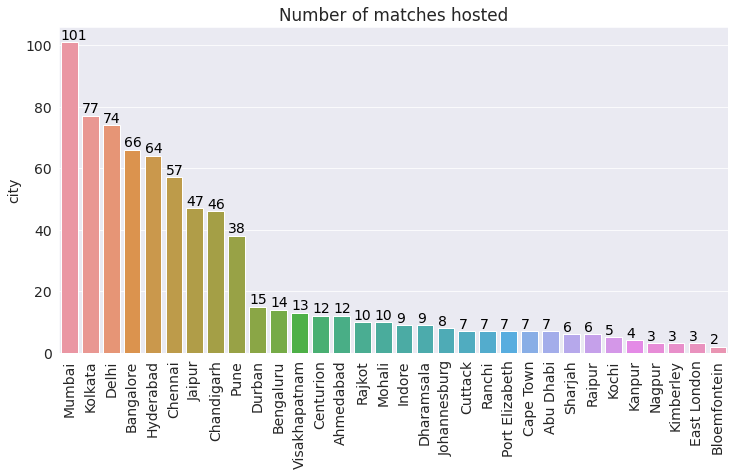

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Number of matches hosted')
count=0
cities=pd.DataFrame(city_host)
cities['name']=city_host.index
for i in cities['city']:
    plt.text(count-0.4,i+1,str(i),color='black')
    count+=1
sns.barplot(city_host.index, city_host);

Finding the win percentage of each team

In [26]:
#Matches played vs Matches won
matches_played=pd.concat([ipl_df['team1'],ipl_df['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=ipl_df['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)

In [27]:
matches_played.reset_index()

,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,15


In [28]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Kings XI Punjab                47.7
Chennai Super Kings            50.0
Delhi Daredevils               46.6
Rajasthan Royals               45.6
Sunrisers Hyderabad            53.7
Deccan Chargers                38.7
Pune Warriors                  32.6
Gujarat Lions                  43.3
Rising Pune Supergiants        40.0
Delhi Capitals                 62.5
Kochi Tuskers Kerala           42.9
dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


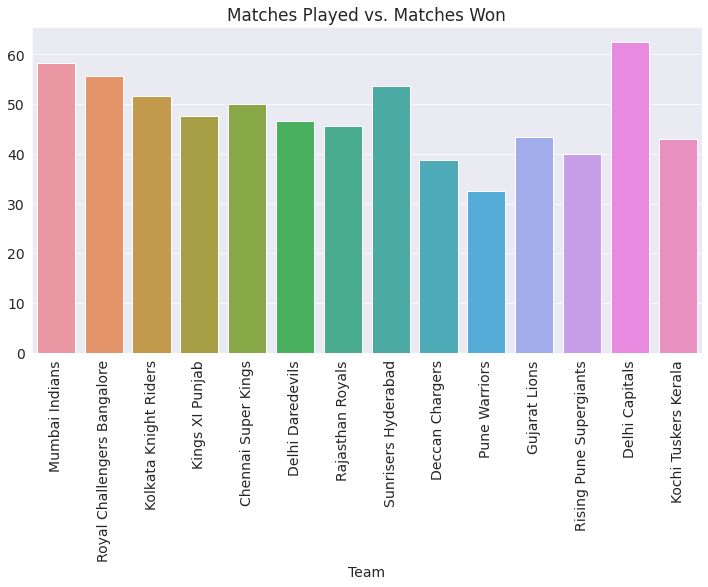

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Matches Played vs. Matches Won')
sns.barplot(matches_played['Total Matches'].index, win_percentage);

Finding number of matches held on each stadium

In [30]:
#Matches held on each stadium
stadium=ipl_df.venue.value_counts()
stadium

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


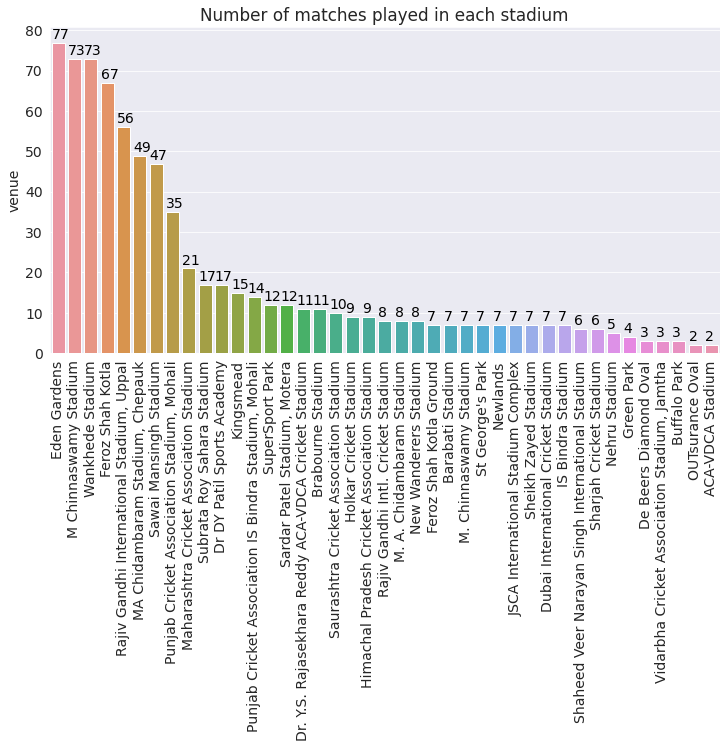

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Number of matches played in each stadium')
count=0
stadiums=pd.DataFrame(stadium)
stadiums['name']=stadium.index
for i in stadiums['venue']:
    plt.text(count-0.4,i+1,str(i),color='black')
    count+=1
sns.barplot(stadium.index, stadium);

Finding number of matches which are won by batting first and also by number of runs

In [32]:
#Number of runs by which a team won
#batting_first_team_max = ipl_df[ipl_df.win_by_runs != 0].max()
batting_first_team = ipl_df[ipl_df.win_by_runs != 0]

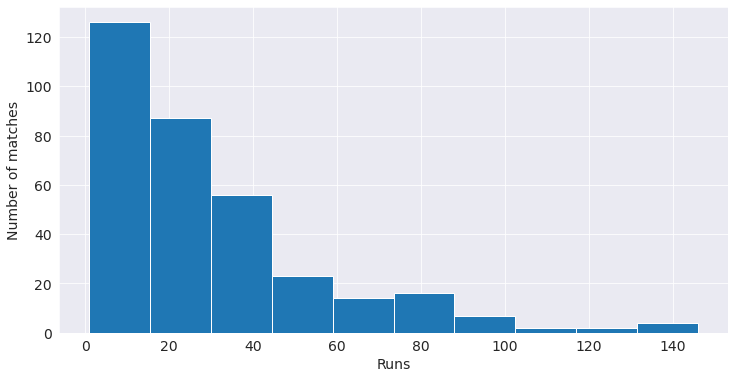

In [33]:
plt.figure(figsize=(12,6))
plt.hist(batting_first_team['win_by_runs'])
plt.xlabel('Runs')
plt.ylabel('Number of matches')
plt.show()

Finding number of matches which are won by batting second and by number of wickets

In [34]:
#Number of wickets by which a team won
bowling_first_team = ipl_df[ipl_df.win_by_wickets != 0]

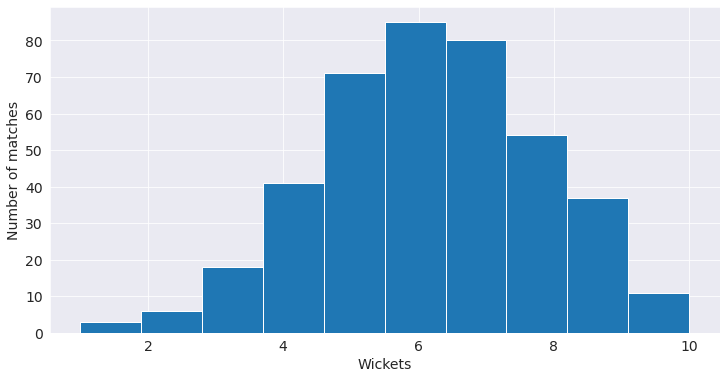

In [35]:
plt.figure(figsize=(12,6))
plt.hist(bowling_first_team['win_by_wickets'])
plt.xlabel('Wickets')
plt.ylabel('Number of matches')
plt.show()

Let us save and upload our work to Jovian before continuing

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yaswanthbandi2003/analysis-on-indian-premere-league" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league


'https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league'

## Asking and Answering Questions

By generating questions and giving answer using various tools we can Gain maximum insight into the data set and its underlying structure. Uncover a parsimonious model, which explains the data with a minimum number of predictor variables.



#### Q1: TODO - Which player has won most number of M.O.M awards?

In [38]:
#finding which player has become the man of the match most number of times
m_o_m = ipl_df.player_of_match.value_counts()


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


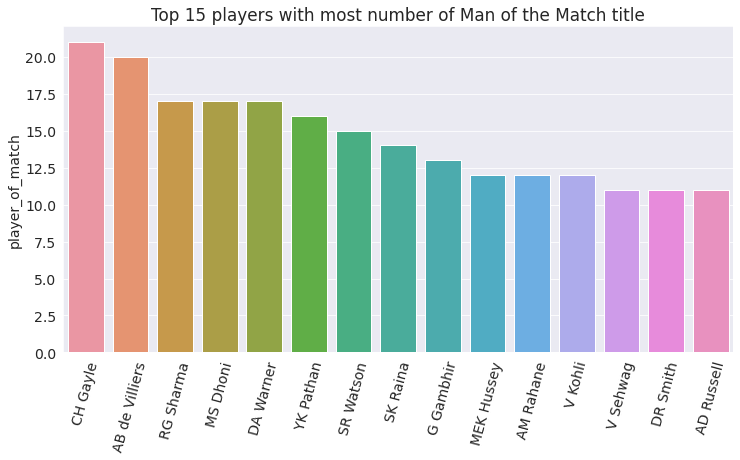

In [39]:
m_o_m_15 = m_o_m[:15]
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 15 players with most number of Man of the Match title')
sns.barplot(m_o_m_15.index, m_o_m_15);

#### Q2: TODO - Find the top 10 run scores ?

In [40]:
#Top 10 run scorers
batsmen = deliveries_df.groupby('batsman').apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsmen_sorted=batsmen.sort_values(by='Runs',ascending=False)
top_batsmen=batsmen_sorted[:10]
top_batsmen

,batsman,Runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


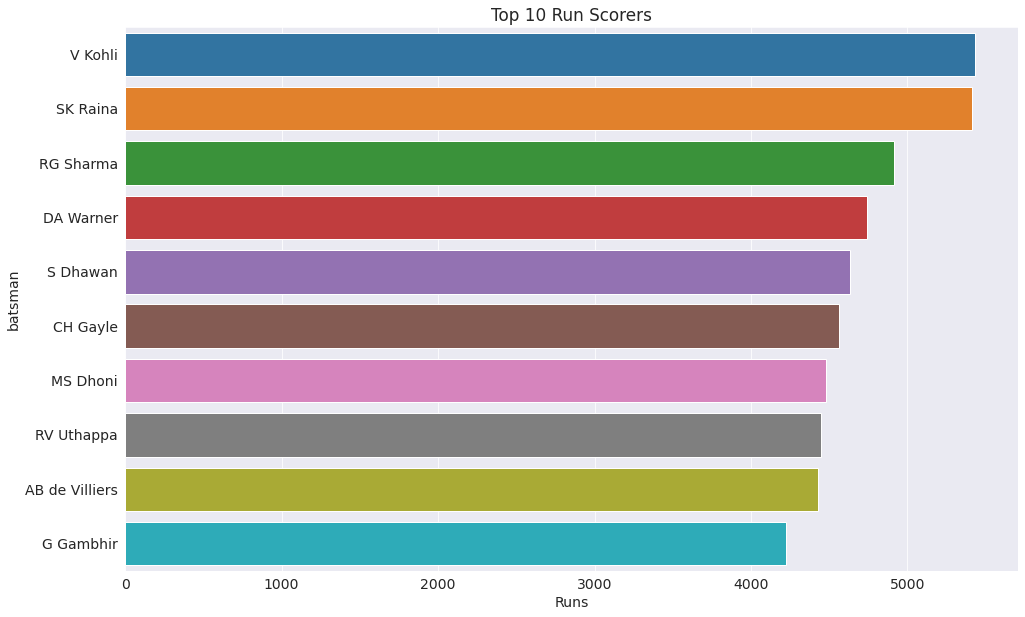

In [41]:
plt.figure(figsize=(16,10))
plt.title('Top 10 Run Scorers')
sns.barplot(top_batsmen['Runs'],top_batsmen['batsman']);

#### Q3: TODO - Find the top 10 wicket takers?

In [42]:
#finding the top 10 Highest wicket taker
sample_df = deliveries_df[deliveries_df.dismissal_kind.notnull()].copy()
bowlers = sample_df.bowler.unique()
bowler_wicket_df = pd.DataFrame(columns = ["name","wickets"])
for player in bowlers:
    tot = (sample_df.bowler == player).sum()
    bowler_wicket_df = bowler_wicket_df.append({"name": player,"wickets":tot},ignore_index = True)
highest_wicket = bowler_wicket_df.sort_values("wickets",ascending = False).head(10)

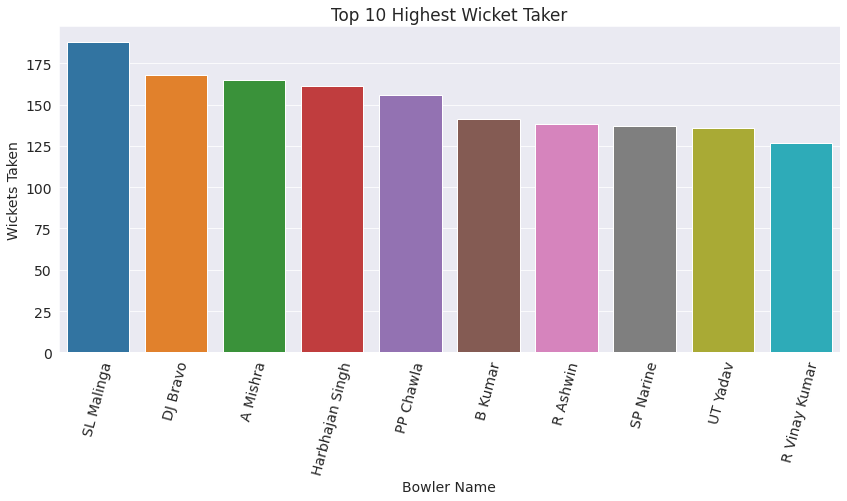

In [43]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=75)
plt.title("Top 10 Highest Wicket Taker")
sns.barplot(x=highest_wicket.name, y=highest_wicket.wickets).set(xlabel ="Bowler Name",ylabel = "Wickets Taken");

#### Q4: TODO - Find the winning record of teams by batting first

In [44]:
#Getting the records where a team won batting first
#If a team bats first and wins, then it will reflect in win by runs and if a team bats second, then it will reflect in winds by wickets
batting_first = ipl_df[ipl_df['win_by_runs']!=0]

In [45]:
#Finding the number of wins with respect to each team after batting first and describing it in a variable
batting_first2 = batting_first['winner'].value_counts()

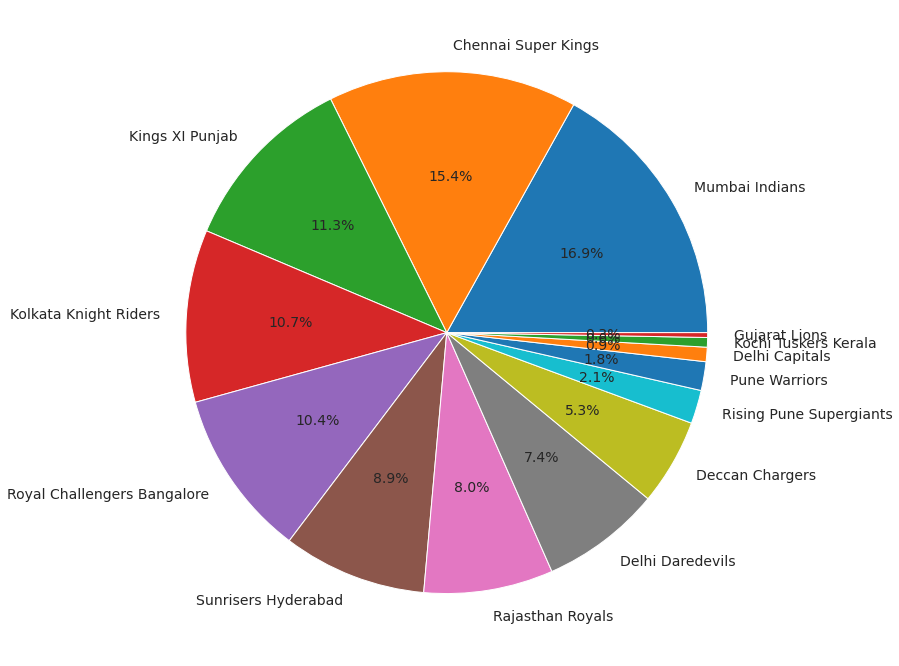

In [46]:
#Showing the batting first data in a pie chart to reflect wins of all the teams who chose to bat first
plt.figure(figsize= (12,12))
plt.pie(batting_first2, labels = batting_first2.index, autopct = '%0.1f%%')
plt.show()

#### Q5: TODO - Find the winning record of teams by batting second

In [47]:
#Finding the teams records where the teams got batting second
batting_second = ipl_df[ipl_df['win_by_wickets']!=0]

In [48]:
#Finding the number of wins with respect to each team after batting second and describing it in a variable
batting_second2 = batting_second['winner'].value_counts()

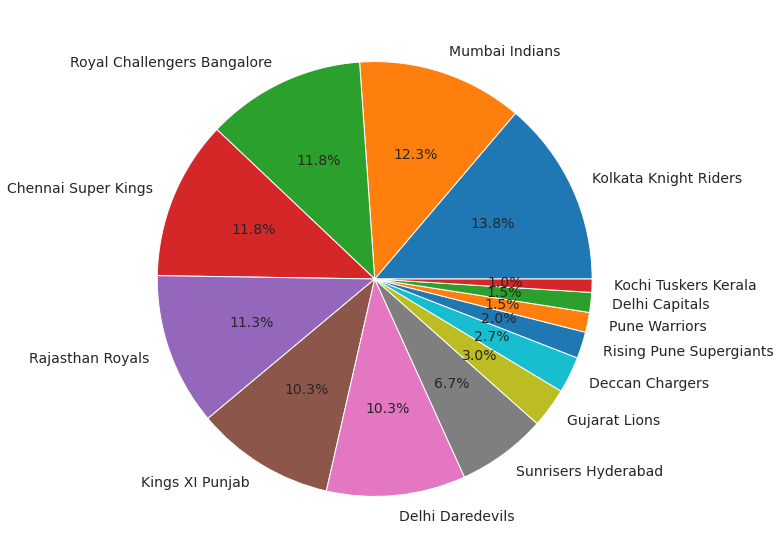

In [49]:
#Making a pie chart to diplay the data for all the teams
plt.figure(figsize = (10,10))
plt.pie(batting_second['winner'].value_counts(), labels = batting_second['winner'].value_counts().index, autopct = '%0.1f%%')
plt.show()

Let us save and upload our work to Jovian before continuing.

In [50]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yaswanthbandi2003/analysis-on-indian-premere-league" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league


'https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league'

## Inferences and Conclusion

Cricket is an interesting sport where we saw a number of factors that can affect a game's outcome. There are a lot more like this.There are so many insights we can achieve. With more data, like the auction data, we can decide which teams can do better with which players.We can also predict information such as the win probability each over and it can be useful for betting industries.

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yaswanthbandi2003/analysis-on-indian-premere-league" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league


'https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league'

## References and Future Work

I am very excited to use this data analysis in embedded system as an electrical engineer. To create analytics that process massive amounts of business and engineering data that enable in many industries to develop intelligent products and services. I can use analytics to describe and predict a system’s behavior, and further combine analytics with embedded control systems to automate actions and decisions.

References:

>-International Journal of Recent Technology and Engineering (IJRTE) ISSN: 2277-3878, Volume-7 Issue-4S, November 2018

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yaswanthbandi2003/analysis-on-indian-premere-league" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league


'https://jovian.ai/yaswanthbandi2003/analysis-on-indian-premere-league'

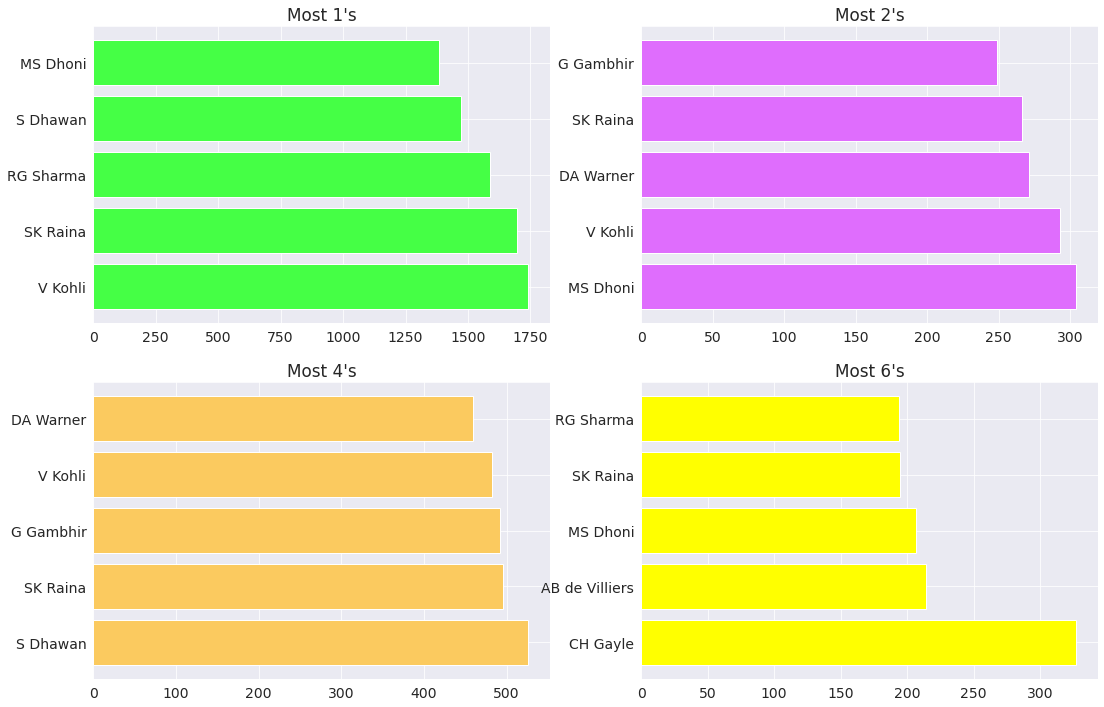

In [56]:
toppers=deliveries_df.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
plt.show()